 # MPA-MLF, Lab 7 - Convolutional Neural Network

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

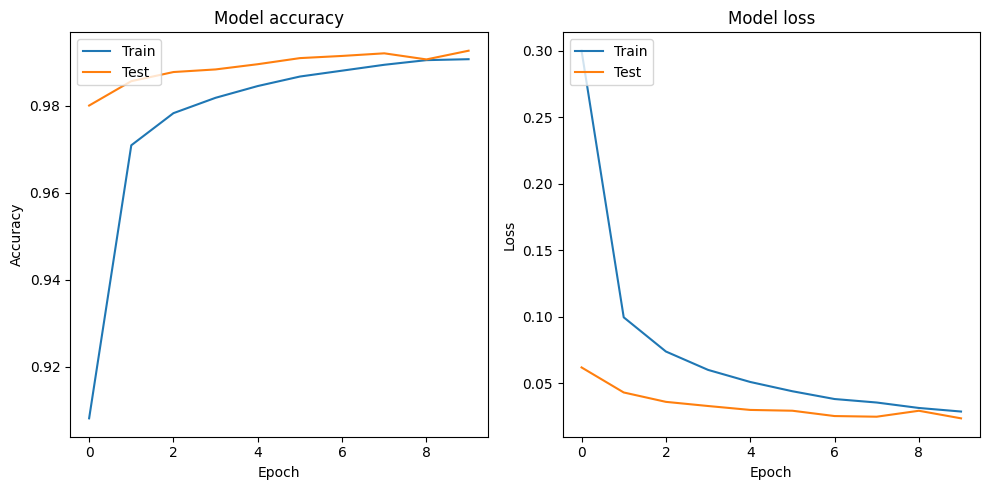

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

###################################
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension (since it's grayscale)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert the labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

###################################
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

###################################
# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
###################################


### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [5]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

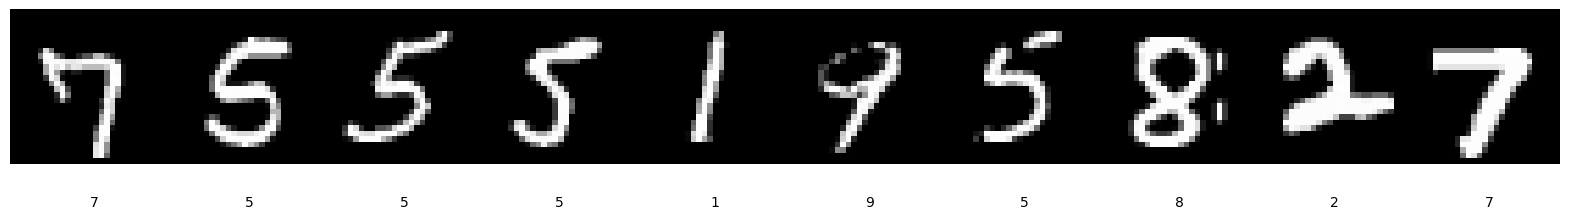

In [7]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

1. **What kind of data occurs in our dataset?**
   - The dataset consists of handwritten digits.

2. **How many data samples do we have in train and test datasets?**
   - Typically, the MNIST dataset contains 60,000 training samples and 10,000 test samples.

3. **How many color channels does the input variable have?**
   - The MNIST dataset consists of grayscale images, so it has a single color channel.

4. **What is the size of the input images?**
   - The input images in the MNIST dataset are 28 pixels by 28 pixels.

5. **What is the necessary preprocessing of the input data X?**
   - The input data X needs to be normalized to have values between 0 and 1, as the pixel values originally range from 0 to 255. Additionally, for CNNs, it's common to reshape the input data to include a channel dimension.

6. **How many classes do we have in the target variable?**
   - In the MNIST dataset, there are 10 classes corresponding to the digits 0 through 9.

7. **What is the necessary preprocessing of the target variable y?**
   - The target variable y needs to be converted into a one-hot encoded format, where each digit class is represented by a binary vector of length 10, with a 1 at the index corresponding to the digit and 0s elsewhere. This is commonly done to facilitate multi-class classification tasks.

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [8]:
###################################
# Write your own code here #
from sklearn.preprocessing import MinMaxScaler

# Normalize the input data (x_train and x_test)
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)
x_test_normalized = scaler.transform(x_test.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)

# Perform one-hot encoding for the target variable (y_train and y_test)
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)



###################################

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [9]:
model = Sequential()
###################################
# Write your own code here #
# Define the model structure
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])


###################################


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [11]:
# Compile the model
learning_rate = 0.001  # Example learning rate, you can adjust as needed
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# Print model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In this code snippet, I've defined the optimizer, loss function, and evaluation metrics for compiling the model. Adjust the learning rate and other hyperparameters based on your experimentation and requirements. Finally, the model summary is printed to provide an overview of the model architecture.

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [12]:
# Define relevant hyperparameters
epochs = 10
batch_size = 128
validation_split = 0.2

# Train the model
history = model.fit(x_train_normalized, y_train_onehot, epochs=epochs, batch_size=batch_size, validation_split=validation_split)


Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4092 - accuracy: 0.8896 - val_loss: 0.1998 - val_accuracy: 0.9460
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1652 - accuracy: 0.9537 - val_loss: 0.1238 - val_accuracy: 0.9668
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1085 - accuracy: 0.9690 - val_loss: 0.0962 - val_accuracy: 0.9737
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0845 - accuracy: 0.9765 - val_loss: 0.0812 - val_accuracy: 0.9778
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0718 - accuracy: 0.9798 - val_loss: 0.0780 - val_accuracy: 0.9787
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0628 - accuracy: 0.9824 - val_loss: 0.0760 - val_accuracy: 0.9782
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0555 - accuracy: 0.9838 - val_loss: 0.0697 - val_accuracy: 0.9799
Epoch 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

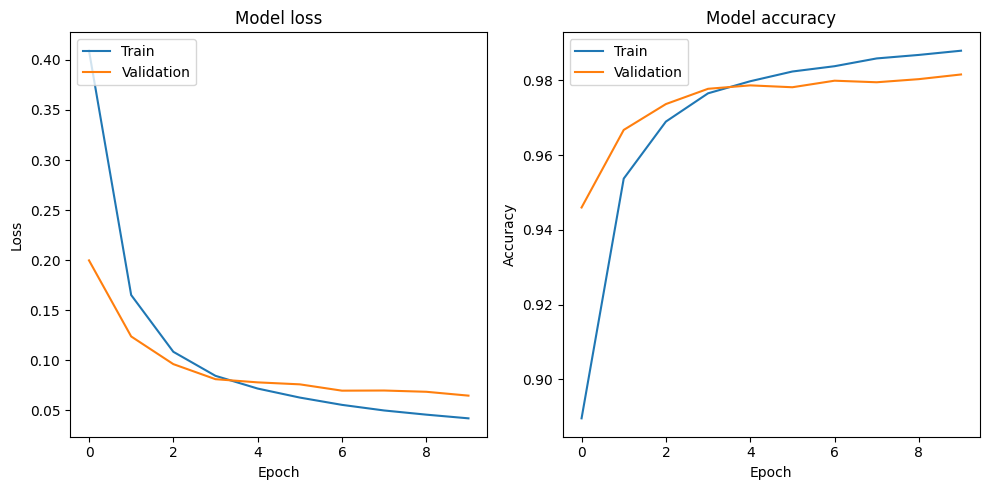

In [13]:
# Plot the development of the training and validation loss
plt.figure(figsize=(10, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the development of the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_onehot)

# Make predictions on the testing dataset
y_pred = model.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


313/313 [==============================] - 3s 10ms/step
Test Loss: 0.0545467771589756
Test Accuracy: 0.9825999736785889
Accuracy: 0.9826
Confusion Matrix:
[[ 967    0    2    0    1    1    3    2    3    1]
 [   0 1127    3    1    1    0    0    0    3    0]
 [   2    4 1013    3    1    0    1    6    2    0]
 [   0    0    5  996    0    5    0    0    3    1]
 [   0    1    0    0  973    0    0    1    1    6]
 [   2    0    1    5    0  879    4    0    1    0]
 [   7    2    0    0    5    3  939    0    2    0]
 [   0    1   10    3    1    0    0 1003    2    8]
 [   5    0    5    4    3    1    1    4  944    7]
 [   3    1    1    2    9    2    0    5    1  985]]


In this code, I've evaluated the trained model on the testing dataset by computing the test loss and accuracy using the evaluate method. Then, I've made predictions on the testing dataset and calculated the accuracy using scikit-learn's accuracy_score function. Additionally, I've computed the confusion matrix using scikit-learn's confusion_matrix function to evaluate the performance of the model across different classes. Adjust the metrics as needed based on your requirements.

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

In [15]:
from keras.layers import Dropout
from keras.regularizers import l1, l2

# Define the model with regularization techniques
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model with adjusted hyperparameters
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# Train the model with adjusted batch size and epochs
epochs = 20
batch_size = 64
history = model.fit(x_train_normalized, y_train_onehot, epochs=epochs, batch_size=batch_size, validation_split=validation_split)


Epoch 1/20
750/750 [==============================] - 9s 6ms/step - loss: 0.4140 - accuracy: 0.9120 - val_loss: 0.1688 - val_accuracy: 0.9773
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1877 - accuracy: 0.9681 - val_loss: 0.1197 - val_accuracy: 0.9849
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1545 - accuracy: 0.9737 - val_loss: 0.1134 - val_accuracy: 0.9848
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1404 - accuracy: 0.9770 - val_loss: 0.1027 - val_accuracy: 0.9868
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1301 - accuracy: 0.9795 - val_loss: 0.1028 - val_accuracy: 0.9862
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1220 - accuracy: 0.9806 - val_loss: 0.1009 - val_accuracy: 0.9867
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1183 - accuracy: 0.9816 - val_loss: 0.0933 - val_accuracy: 0.9891
Epoch 